In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Model/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
#Creating generator
train_ds = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    '/content/evaluation',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [7]:
#Creating model
model = Sequential()

model.add(Conv2D(16,kernel_size = (3,3),strides = 1,padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Conv2D(32,kernel_size = (3,3),strides = 1,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Flatten())

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=625,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=lr_schedule),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [8]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 5)

In [9]:
history = model.fit(train_ds,epochs = 100,validation_data = val_ds,callbacks = [es])

Epoch 1/100
625/625 [==============================] - 61s 85ms/step - loss: 0.9155 - accuracy: 0.5897 - val_loss: 0.6975 - val_accuracy: 0.6186
Epoch 2/100
625/625 [==============================] - 53s 83ms/step - loss: 0.6303 - accuracy: 0.6399 - val_loss: 0.5859 - val_accuracy: 0.6984
Epoch 3/100
625/625 [==============================] - 50s 80ms/step - loss: 0.6009 - accuracy: 0.6707 - val_loss: 0.5758 - val_accuracy: 0.7112
Epoch 4/100
625/625 [==============================] - 50s 79ms/step - loss: 0.5645 - accuracy: 0.7035 - val_loss: 0.9389 - val_accuracy: 0.6146
Epoch 5/100
625/625 [==============================] - 54s 85ms/step - loss: 0.5623 - accuracy: 0.7145 - val_loss: 1.0294 - val_accuracy: 0.7214
Epoch 6/100
625/625 [==============================] - 57s 91ms/step - loss: 0.5232 - accuracy: 0.7385 - val_loss: 0.5173 - val_accuracy: 0.7594
Epoch 7/100
625/625 [==============================] - 51s 80ms/step - loss: 0.4901 - accuracy: 0.7563 - val_loss: 0.5835 - val_ac

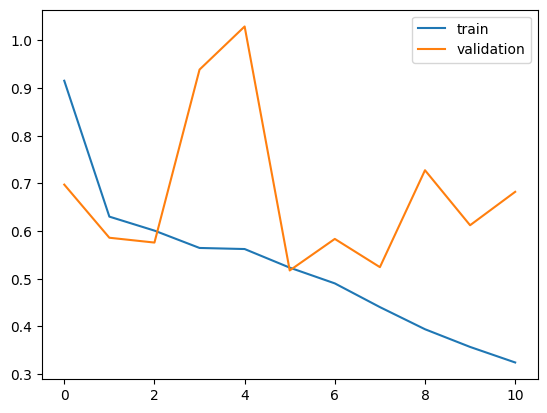

In [10]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'validation')
plt.legend()

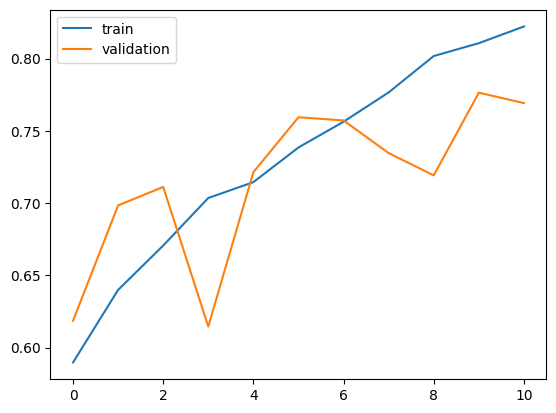

In [11]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'validation')
plt.legend()

In [34]:
from PIL import Image
import numpy as np
from skimage import transform
def make_prediction(image):
  np_image = Image.open(image)
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (256, 256, 3))
  np_image = np.expand_dims(np_image, axis=0)
  prediction = model.predict(np_image)
  if prediction <=0.5:
    print("Image is cat")
  else:
    print("Image is dog")

1/1 [==============================] - 0s 29ms/step
Image is cat




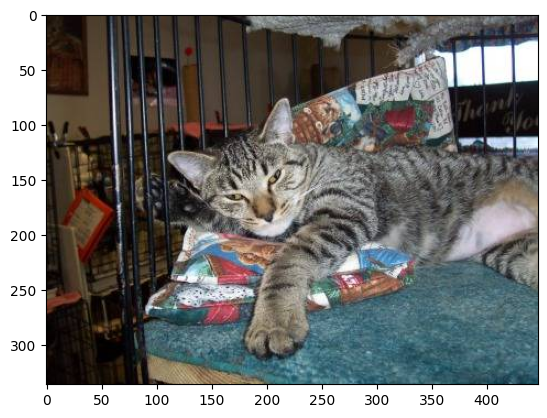

In [47]:
path = '/content/evaluation/cat/180.jpg'
make_prediction(path)
print()
print()
image = plt.imread(path)
plt.imshow(image)

1/1 [==============================] - 0s 111ms/step
Image is dog


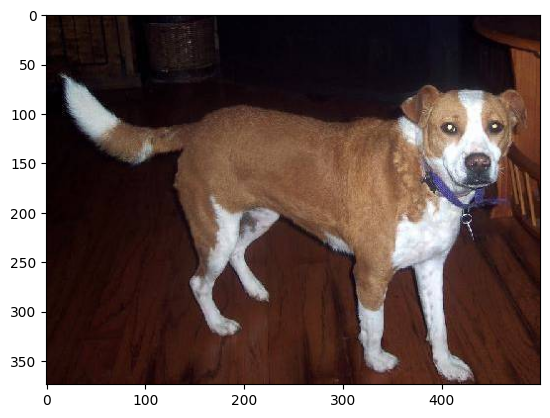

In [48]:
path = '/content/evaluation/dog/147.jpg'
image = plt.imread(path)
plt.imshow(image)
make_prediction(path)